# Introduction

For the purpose of this project Iam going to frame it as follows, a business owner came to me and asked me as a data analyst to use my skills to create efficiencies within the business and increase profitability. This can be achieved by identifying patterns within the data, allowing the business owner to follow a strategy of cross selling or up selling products which are likely to be bought in conjunction with one another.
The business owner may also wish to know what time of the year will there be peak demand, can I use the data to predict customer churn, can I use the membership numbers to carry out customer segmentation analysis or carry out price optimization analysis to maximise profitability or deliver other business objectives.
As a data analyst I must consider what is deliverable for the stakeholders versus their expectations. I need to balance these expectations given the data I have been provided with. I may need to ask questions of our stakeholders before I can consider  when the project is completed. I would also need to consider a time frame to complete the project to prevent me going down rabbit holes.
I will work on the basis that any model I may run will be only as good as the data I give it. The majority of my time will be spent on data cleaning and preparation.
I will then consider how I can explore the data to find the truth that lies within it. I may need to use feature engineering or reduce the dimensionality of the data which will allow our models to work better. I may need to create new columns which will allow me extract valuable insights from the data, however I need to be mindful that my actions do not increase noise in the data ultimately our aim as a data analyst is to get to ground truth of the data whatever that may be.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')
from mlxtend.preprocessing import TransactionEncoder
%matplotlib inline
import datetime
from datetime import datetime, date, time, timedelta, timezone
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn import tree 
from sklearn.metrics import confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split  
sns.set()






In [2]:
from IPython.display import HTML # Code taken from class notes David McQuaid December 2022

HTML('''<script>

code_show=true; 

function code_toggle() {

 if (code_show){

 $('div.input').hide();

 } else {

 $('div.input').show();

 }

 code_show = !code_show

} 

$( document ).ready(code_toggle);

</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
def generate_harvard_citation(author,year,title,url,access_date):
    citation= f'{author},{year}.{title}.[Online Course] Udemy.Available at: {url} [Accesed] {access_date}]'
    return citation

In [4]:

# Example usage
author = "Viskaha 18"
year = "2020"
title =' Market basket analysis'
url = "https://github.com/vishakha-b18/Market-Basket-Analysis"
access_date = "11-6-2023"
citation = generate_harvard_citation(author, year, title, url, access_date)
print(citation)

Viskaha 18,2020. Market basket analysis.[Online Course] Udemy.Available at: https://github.com/vishakha-b18/Market-Basket-Analysis [Accesed] 11-6-2023]


In [5]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# First look at Data

In [7]:
data=pd.read_csv('Groceries_dataset.csv')
print (data.shape)
data.head(5)

(38765, 3)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


We use the data.head & data.shape function to evaluate our data in general and by column. This allows to develop a initial
feel for our data. 

We can see from our data that we have 38,765 rows and 3 columns se we can rule out straight away any issuses with dimensionality
If their were instance 38,765 columns and 3 rows in this instance we would have known as the curse of dimensionality
and would need to consider Principal discriminant analysis for  to reduce the dimensionality of our data set or Linear 
Discriminamnt analysis a  to do likewise.

We can see we have membership numbers and a date which may help us achieve the business goals of our project. We can also see we have item description which will allow us complete a market basket analysis.However there are number of issuses with our data itemDescription is in the form of categorical data and will be encoded using a suitable techinque as some machine learning models cannot handle text.

We also need to understand that in the current narrow format we will need to transform our data in to a wide format before we carry out market basket analysis.

We will also need to consider how later on we can carry out feature engineering to gain further insights into our data. we may need to consider adding an addional columns such as a month column which will may help us look at the seasonal nature of the business. Since we have a date we will be also be able to out time series analysis on our data. 

# Data Cleaning

Data cleaning is an essential part of any machine learning project. Algorithms such as Decision trees can deal with missing data,malformed data & duplicated values however an algorithm such as linear regression cannot deal with missing values as they rely on a relationship between the different data points.

Irrelvant Data- We need to remove as much irrelvant data as we can from our database in an effort to reduce noise
however we need to be careful that we do not remove features which will facilate us in resolving the business problem
we have been presented with. The benefit in carrying out this task succesfully will lead to better conclusions or predictions when we run our machine learning models.

In [8]:
data.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [9]:
data.describe(include='all')

,Member_number,Date,itemDescription
count,38765.000000,38765,38765
unique,NaN,728,167
top,NaN,21-01-2015,whole milk
freq,NaN,96,2502
mean,3003.641868,NaN,NaN
std,1153.611031,NaN,NaN
min,1000.000000,NaN,NaN
25%,2002.000000,NaN,NaN
50%,3005.000000,NaN,NaN
75%,4007.000000,NaN,NaN


We can see from the above code we not seem to have any missing values, this is important as missing values will play havoc with any machine learning models we try to run. 

In [10]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['Member_number'], object: ['Date', 'itemDescription']}

We can see from our code tht the data column is an object we will need to change it to a datetime to allow for data specific operations, facilate time based analysis and also support data based filtering and sorting.

In [11]:
data['Date']=pd.to_datetime(data['Date'])

In [12]:
data.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


We can see from our info function that we have no miising values and our data is off the correct type to allow for further maniuplation 

In [14]:
data.isna().any()

Member_number      False
Date               False
itemDescription    False
dtype: bool

In [15]:
data['itemDescription'].unique().size

167

We have 167 unique produducts in our dataset. Given that in a recent UKGrocer reports that Tesco have a product line of 1811 & Asda 3847. These may not be unique products but it could suggest that the product lines in our dataset have been grouped togrther. It may suggest that the grocery dataset may have been taken from a convenicence store. It could also suggest our dataset is complete or the data was not collected correctly. This may lead to week patterns of association being made when it come to our market basket analysis this is something we need to be aware as data analysts the limitations of our data.

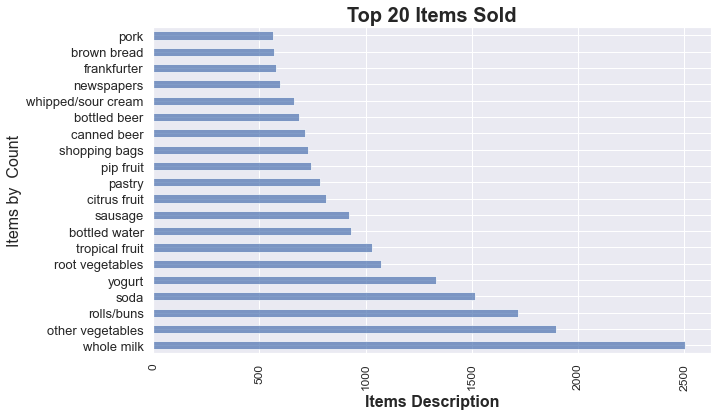

In [16]:
plt.figure(figsize=(10,6))
top10=data['itemDescription'].value_counts().head(20)
top10.plot.barh(color='b',alpha=.7)
# Customize chart
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=13)
plt.title('Top 20 Items Sold',fontsize=20,fontweight='bold')
plt.xlabel('Items Description',fontsize=16,fontweight='bold')
plt.ylabel('Items by  Count',fontsize=16)
plt.show()


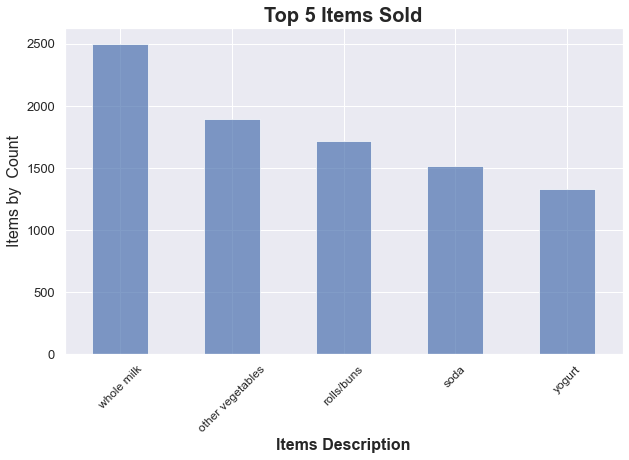

In [17]:
plt.figure(figsize=(10,6))
top10=data['itemDescription'].value_counts().head(5)
top10.plot.bar(color='b',alpha=.7)
# Customize chart
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=13)
plt.title('Top 5 Items Sold',fontsize=20,fontweight='bold')
plt.xlabel('Items Description',fontsize=16,fontweight='bold')
plt.ylabel('Items by  Count',fontsize=16)
plt.show()

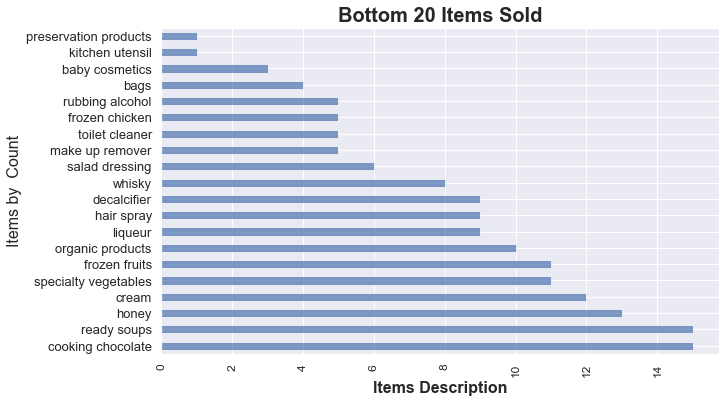

In [18]:
plt.figure(figsize=(10,6))
top10=data['itemDescription'].value_counts().tail(20)
top10.plot.barh(color='b',alpha=.7)
# Customize chart
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=13)
plt.title('Bottom 20 Items Sold',fontsize=20,fontweight='bold')
plt.xlabel('Items Description',fontsize=16,fontweight='bold')
plt.ylabel('Items by  Count',fontsize=16)
plt.show()

In [19]:
duplicate_Data = data[data.duplicated(subset=data.columns,keep=False)]
duplicate_Data

,Member_number,Date,itemDescription
63,1663,2015-02-07,rolls/buns
98,3645,2015-12-12,citrus fruit
129,3779,2015-09-15,frankfurter
213,3812,2015-07-21,sausage
216,1344,2015-09-04,bottled water
...,...,...,...
38614,2027,2014-02-26,domestic eggs
38684,2936,2014-03-07,newspapers
38685,2311,2014-03-13,pot plants
38722,3834,2014-05-18,salty snack


In [20]:
items_sold_per_date = data.groupby('Date')['itemDescription'].count()
print(items_sold_per_date)

Date
2014-01-01    48
2014-01-02    55
2014-01-03    46
2014-01-04    39
2014-01-05    59
              ..
2015-12-26    37
2015-12-27    74
2015-12-28    58
2015-12-29    57
2015-12-30    53
Name: itemDescription, Length: 728, dtype: int64


We have used the duplicated function to search for duplicates in our dataframe .we have 728 duplicate values and we could possibly remove them, however if we remove them we are introducing personal bias in our model this is because we would be assuming that the member did not make a repeat visit to the store. There may be a issue with the collection of the data. In this instance we may need to investigate further however for the purpose of this we will leave the duplicated values in our dataset.
Standardize data - Some Machine learning models assume that the data presented will have a value of between 0 and 1 if we present data that is not standardized the model may perform badly. While scaling reduces the value of the features we apply the same technique to all the characteristics this results in the association between the variables being maintained. Data analysts only care about the relationship and distance between variables not their values We can use standard-scaler to standardize the data.
Scaling transformation – we can also scaling our data this function offers the same result as standardize data however if we use min-max scale we preserve the distribution of our data and guarantees the values fall within a specific range.
It is important to understand that we use the right scaling technique based on the right characteristic of our data and the needs of the algorithm we will use
Outliers. As we have no numeric data we can not check for outliers. Outliers can mess up any analysis as they skew the distribution of our data. an example would were we have a very wealthy person in a salary dataset this will in the mean being skewed to the right however in this instance it would be correct to remove the data point. however in other circumstances outliers to predict outcomes. As they may suggest a changing of a trend. we can visualise outliers through the use of box plots.
  

# Univarate data analysis

Univariate data analysis refers to the analysis of a single variable or feature in a dataset. It focuses on understanding the distribution, central tendency, variability, and other characteristics of that specific variable. Univariate analysis provides valuable insights into the individual variable's behaviour and helps in identifying patterns or trends.

In univarate analysis we could use techniques such as descripitve statistics. We would look at the mean, median,mode and range of our data. we would also look at the distribution of our data does it form bell curve, is it multimodial,is it skewed to the right or left this  analysis is crucial to understand the data as this will determine the models we will use for our predictive analysis as our algorithms can perform differently  depending on the nature of the data it is presented with. 

In [21]:
data['Month']= data['Date'].dt.month

In [22]:
data.head(2)

,Member_number,Date,itemDescription,Month
0,1808,2015-07-21,tropical fruit,7
1,2552,2015-01-05,whole milk,1


We are going to carry out some feature engineering to help our models to minimize loss when predicting outcomes.
we have a date column so we can add extra features. We add extra features to try and improve the predictive power of our models. We also aim to use existisng data to that may capture underlying relationships within our data.


In [23]:
df_new=data.copy()

In [24]:
df_new['Quantity'] =1
df_new['Date'] = pd.to_datetime(data['Date'])
df_new['Month']=data['Date'].apply(lambda x: x.month)
df_new['Day of The Week']=data['Date'].apply(lambda time: time.dayofweek)
df_new['Year']=data['Date'].apply(lambda t: t.year)
df_new['Day']=data['Date'].apply(lambda t: t.day)


In [25]:
df_new.head()

,Member_number,Date,itemDescription,Month,Quantity,Day of The Week,Year,Day
0,1808,2015-07-21,tropical fruit,7,1,1,2015,21
1,2552,2015-01-05,whole milk,1,1,0,2015,5
2,2300,2015-09-19,pip fruit,9,1,5,2015,19
3,1187,2015-12-12,other vegetables,12,1,5,2015,12
4,3037,2015-02-01,whole milk,2,1,6,2015,1


In [26]:
month_to_qtr = {1:1,2:1,3:1,4:2,5:2,6:2,7:3,8:3,9:3,10:4,11:4,12:4}
df_new['Qtr']=df_new['Month'].map(month_to_qtr)

In [27]:
df_new.head()

,Member_number,Date,itemDescription,Month,Quantity,Day of The Week,Year,Day,Qtr
0,1808,2015-07-21,tropical fruit,7,1,1,2015,21,3
1,2552,2015-01-05,whole milk,1,1,0,2015,5,1
2,2300,2015-09-19,pip fruit,9,1,5,2015,19,3
3,1187,2015-12-12,other vegetables,12,1,5,2015,12,4
4,3037,2015-02-01,whole milk,2,1,6,2015,1,1


In [28]:
df_new.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
Month                       int64
Quantity                    int64
Day of The Week             int64
Year                        int64
Day                         int64
Qtr                         int64
dtype: object

# The Business Problem

The business owner would like to drive volume and profitability through the business by increasing the amount spent by each customer who visits the store. He wants to formulate a marketing strategy that identifies customer who currently underspend in the store however he also wants to target higher spend customers with a marketing campaign to encourage them to buy higher value products.

We advise the business owner we can use the date we have to segement his customers in to low, medium, and high spend and use a machine learing model to predict what segement future customers would fall in to. We advise could help the business owner this would allow him to devise a highly cost effective marketing strategy.


In [29]:
items_sold_by_date= df_new.groupby('Date')['itemDescription'].count()
items_sold_by_date.head()


Date
2014-01-01    48
2014-01-02    55
2014-01-03    46
2014-01-04    39
2014-01-05    59
Name: itemDescription, dtype: int64

In [30]:
items_sold_by_date_df=pd.DataFrame(items_sold_by_date).reset_index()
df_new=df_new.merge(items_sold_by_date_df, how = 'left', on="Date")
df_new.head()


,Member_number,Date,itemDescription_x,Month,Quantity,Day of The Week,Year,Day,Qtr,itemDescription_y
0,1808,2015-07-21,tropical fruit,7,1,1,2015,21,3,93
1,2552,2015-01-05,whole milk,1,1,0,2015,5,1,68
2,2300,2015-09-19,pip fruit,9,1,5,2015,19,3,57
3,1187,2015-12-12,other vegetables,12,1,5,2015,12,4,43
4,3037,2015-02-01,whole milk,2,1,6,2015,1,1,61


In [31]:
df_new=df_new.rename(columns={'itemDescription_x':'item Description', 'itemDescription_y': 'Qty Sold'})
df_new.head()

,Member_number,Date,item Description,Month,Quantity,Day of The Week,Year,Day,Qtr,Qty Sold
0,1808,2015-07-21,tropical fruit,7,1,1,2015,21,3,93
1,2552,2015-01-05,whole milk,1,1,0,2015,5,1,68
2,2300,2015-09-19,pip fruit,9,1,5,2015,19,3,57
3,1187,2015-12-12,other vegetables,12,1,5,2015,12,4,43
4,3037,2015-02-01,whole milk,2,1,6,2015,1,1,61


In [32]:
df_new.describe()

,Member_number,Date,Month,Quantity,Day of The Week,Year,Day,Qtr,Qty Sold
count,38765.000000,38765,38765.000000,38765.0,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000
mean,3003.641868,2015-01-09 18:17:12.498387712,6.487605,1.0,3.011092,2014.528518,15.743196,2.501715,56.374900
min,1000.000000,2014-01-01 00:00:00,1.000000,1.0,0.000000,2014.000000,1.000000,1.000000,22.000000
25%,2002.000000,2014-07-12 00:00:00,4.000000,1.0,1.000000,2014.000000,8.000000,2.000000,47.000000
50%,3005.000000,2015-01-21 00:00:00,6.000000,1.0,3.000000,2015.000000,16.000000,2.000000,56.000000
75%,4007.000000,2015-07-10 00:00:00,9.000000,1.0,5.000000,2015.000000,23.000000,3.000000,64.000000
max,5000.000000,2015-12-30 00:00:00,12.000000,1.0,6.000000,2015.000000,31.000000,4.000000,96.000000
std,1153.611031,NaN,3.419042,0.0,1.991645,0.499193,8.816814,1.108675,13.072641


In devising our solution we use the quantity sold column to segement our customers in to 3 categories. However when we look at the quantity sold column the mean does nor look correct. The min items sold is 22 the mean is 56.37 and we have a std of 13.07 this could lead to an unbalanced classes we need to address this  further.

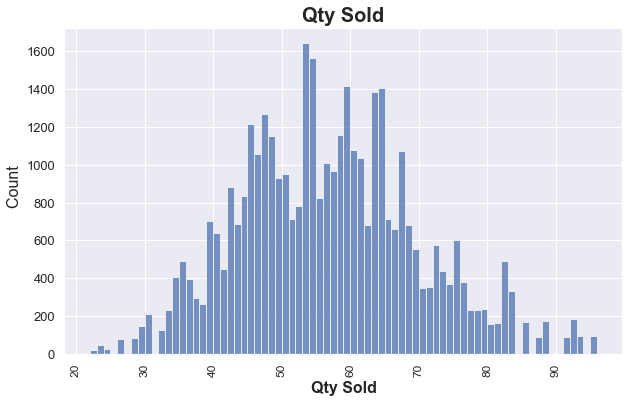

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_new, x='Qty Sold',color="b")
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=13)
plt.title('Qty Sold',fontsize=20,fontweight='bold')
plt.xlabel('Qty Sold',fontsize=16,fontweight='bold')
plt.ylabel('  Count',fontsize=16)
plt.show()

We can see that the histogtam of our quantity sold column is slightly is skewed to the right which suggests that we do not have an even distribution in our data.

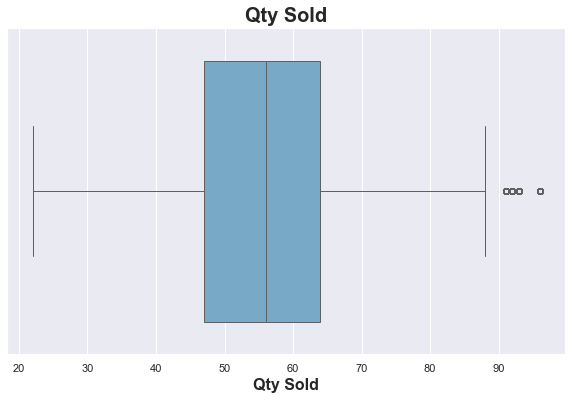

In [34]:
plt.figure(figsize=(10,6))
sns.set(style='darkgrid')
sns.boxplot(x=df_new['Qty Sold'],palette="Blues")
plt.xlabel('Qty Sold',fontsize=16,fontweight='bold')
plt.title('Qty Sold',fontsize=20,fontweight='bold')
plt.show()


We can see that we have outliers in our data, they may be no outliers as we can see from the box plot the count starts at 20 and not at 0 which has skewed our data. We could  just remove them however my aim is to make my data more symmetric. So we will filter out anything beyond two standard deviations from the mean.

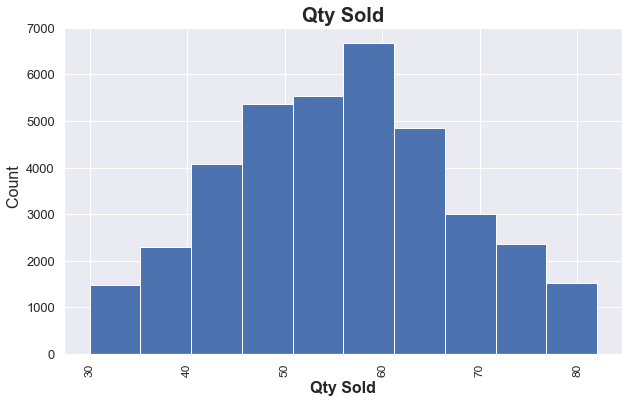

In [35]:
def reject_outliers(data):
    u= np.median(data)
    s= np.std(data)
    filtered= [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return filtered
Qty_Sold= df_new['Qty Sold'].tolist()

filtered_qty= [Qty_Sold]

filtered_qty = reject_outliers(Qty_Sold)

plt.figure(figsize=(10,6))
plt.hist(filtered_qty)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=13)
plt.title('Qty Sold',fontsize=20,fontweight='bold')
plt.xlabel('Qty Sold',fontsize=16,fontweight='bold')
plt.ylabel('  Count',fontsize=16)
plt.show()




Frank Kane,2022. Machine Learning, Data Science and Deep Learning with Python.[Online Course] Udemy.Available at: https://www.udemy.com/course/data-science-and-machine-learning-with-python-hands-on/learn/lecture/4020572?sta [Accesed] 11-6-2023]

In [36]:
mean_qty=np.mean(filtered_qty)
mean_qty

55.64620190106901

In [37]:
std_qty=np.mean(filtered_qty)
std_qty

55.64620190106901

As we can see we have made our distribution normal we will now move on to segement our customer_levels into low,medium and high
using our mean_qty filter.

In [38]:
def customer_levels(Qty):
    mean_level=df_new['Qty Sold'].mean()

    if (Qty) < mean_qty * .75:
        return 'low'
    elif Qty < mean_qty *1.5:
        return 'medium'
    else:
        return 'high'

In [39]:
df_new['customer_levels']=df_new['Qty Sold'].apply(customer_levels)


In [40]:
df_new.head()

,Member_number,Date,item Description,Month,Quantity,Day of The Week,Year,Day,Qtr,Qty Sold,customer_levels
0,1808,2015-07-21,tropical fruit,7,1,1,2015,21,3,93,high
1,2552,2015-01-05,whole milk,1,1,0,2015,5,1,68,medium
2,2300,2015-09-19,pip fruit,9,1,5,2015,19,3,57,medium
3,1187,2015-12-12,other vegetables,12,1,5,2015,12,4,43,medium
4,3037,2015-02-01,whole milk,2,1,6,2015,1,1,61,medium


In [41]:
df_new['customer_levels'].value_counts()


customer_levels
medium    33251
low        4617
high        897
Name: count, dtype: int64

We have created a feature called customer_levels. If the supermarket were to launch a marketing campaign they wish to know if we could segement their customers into groups by items purchased.So we have been able to identify from our feture engineering what customers to target to move customers from low spend to mid spend and mid spend to high spend. This approach woud be more targeted than a traditional blanket marketing campaign.

However when can observe that our data is still unbalanced and this may create a situation where we oversample our data. which may lead to our model not performing well on new unseen data.

In [42]:
df_new.head()

,Member_number,Date,item Description,Month,Quantity,Day of The Week,Year,Day,Qtr,Qty Sold,customer_levels
0,1808,2015-07-21,tropical fruit,7,1,1,2015,21,3,93,high
1,2552,2015-01-05,whole milk,1,1,0,2015,5,1,68,medium
2,2300,2015-09-19,pip fruit,9,1,5,2015,19,3,57,medium
3,1187,2015-12-12,other vegetables,12,1,5,2015,12,4,43,medium
4,3037,2015-02-01,whole milk,2,1,6,2015,1,1,61,medium


In [43]:
d = {'high': 0, 'medium': 1, 'low': 2}
df_new['customer_levels'] = df_new['customer_levels'].map(d)

We have encoded our customer_levels using the map function as some algorithms can only deal with numbers.

In [44]:
df_new.head()

,Member_number,Date,item Description,Month,Quantity,Day of The Week,Year,Day,Qtr,Qty Sold,customer_levels
0,1808,2015-07-21,tropical fruit,7,1,1,2015,21,3,93,0
1,2552,2015-01-05,whole milk,1,1,0,2015,5,1,68,1
2,2300,2015-09-19,pip fruit,9,1,5,2015,19,3,57,1
3,1187,2015-12-12,other vegetables,12,1,5,2015,12,4,43,1
4,3037,2015-02-01,whole milk,2,1,6,2015,1,1,61,1


# Decision Trees

We are now going to use a decision tree for our prediction moodel. This will be a regression model as our label is a number
ie 0,1,2. If we were returing a true or false for instance this would be a classification model. we will have our features(X) our independent variables and customer_ labels(y) will be our dependent label. As we will predicting on a label y this is classed as a supervised model.

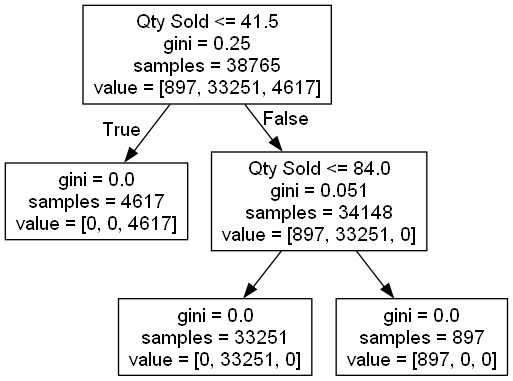

In [45]:
features = ['Month', 'Day of The Week', 'Day', 'Qty Sold','Member_number','Year','Qtr']
X = df_new[features]
y = df_new['customer_levels']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
y = df_new["customer_levels"]
X = df_new[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)
from IPython.display import Image  
from six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


We have used a decision as it is a powerful but simple algorithm and it is an ideal algorithm to use in the first instance. It is a greedy algorithm and it it is prone to overfitting as its main aim is always to reach a conclusion. We can see that our model is simple  has few branches and nodes and one would expect given its simplicity to be an accurrate model. we can see our model by asking simple questions such as true and false have segemented our customer into three different categories. It is on this model that we would input data to ascertain their spending level and create a appropiate marketing spend.

In [46]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00      6624
           2       1.00      1.00      1.00       946

    accuracy                           1.00      7753
   macro avg       1.00      1.00      1.00      7753
weighted avg       1.00      1.00      1.00      7753

[[ 183    0    0]
 [   0 6624    0]
 [   0    0  946]]


The model has accurately predicted all our classifications. We have returned a perfect precision, recall f1 scores. This is not ideal and is probaly due to the  fact that the patterns within our dataset were easily discovered by our algorithm. The fact that our classes were imbalanced probably lead to our model overfitting the data also given the  our dataset is a grocery one we could use  this model to predict as the costs with misclassifying some customers would be ok. However if we say were trying to predict fraudalent activitives we could not use this model as we would be saying there were no fraudelent activies detected. In this instance we would need to revisit our data and introduce new feaures to our datset or use a function similar to SMOTE to synthetically balance our classes. 

# Ensemble learning using a Random Forest

As we said decision trees are prone to overfitting we can use an ensemble method, bu using a random forest we use multiple trees & samples and let the algorithm decide which is best.

We'll use a random forest of 10 decision trees to predict employment of specific candidate profiles:

In [47]:

from sklearn.ensemble import RandomForestClassifier

clf= RandomForestClassifier(n_estimators=10)
clf=clf.fit(X,y)

y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00      6624
           2       1.00      1.00      1.00       946

    accuracy                           1.00      7753
   macro avg       1.00      1.00      1.00      7753
weighted avg       1.00      1.00      1.00      7753

[[ 183    0    0]
 [   0 6624    0]
 [   0    0  946]]


# XG Boost

In [48]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [49]:
import xgboost as xgb

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
train= xgb.DMatrix(X_train, label= y_train)
test=  xgb.DMatrix(X_test, label= y_test)
param={
    'max_depth':4,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': 3}
epochs = 10
model=xgb.train(param,train,epochs)
predictions = model.predict(test)
print(predictions)
accuracy_score(y_test, predictions)
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)

[1. 1. 2. ... 1. 1. 1.]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00      6624
           2       1.00      1.00      1.00       946

    accuracy                           1.00      7753
   macro avg       1.00      1.00      1.00      7753
weighted avg       1.00      1.00      1.00      7753

[[ 183    0    0]
 [   0 6624    0]
 [   0    0  946]]


Frank Kane,2022. Machine Learning, Data Science and Deep Learning with Python.[Online Course] Udemy.Available at: https://www.udemy.com/course/data-science-and-machine-learning-with-python-hands-on/learn/lecture/4020572?sta [Accesed] 11-6-2023]

XGBoost (Extreme Gradient Boosting) is an optimised implementation of the gradient boosting algorithm, which is a machine technique used for both classification and regression tasks. XGBoost is renowned for its rapidity, scalability and efficicency. The reason for using it is that in recent kaggle competions XGBoost s being used in winning entries.

We have ended up with the same results as our descision trees with both our models performing perfectly.

# Market basket analysis

Have you ever walked in to a supermarket and thought to yourself why is the bread counter at one end of the store and
milk counter at the other end. This is a ploy by the supermarket to get the consumer to walk past as many other products as possible. This allows the supermarket to potentially to increase its profitability by selling more of its products.Intuitively we know that people who buy bread will oftern buy butter & milk as well. But how about crosses that are not as defined this is where market basket analysis comes in it allows supermarkets to identify consumer paterns which may be somewhat obscure and built marketing campaigns around them.

In [51]:
df_new.head()

,Member_number,Date,item Description,Month,Quantity,Day of The Week,Year,Day,Qtr,Qty Sold,customer_levels
0,1808,2015-07-21,tropical fruit,7,1,1,2015,21,3,93,0
1,2552,2015-01-05,whole milk,1,1,0,2015,5,1,68,1
2,2300,2015-09-19,pip fruit,9,1,5,2015,19,3,57,1
3,1187,2015-12-12,other vegetables,12,1,5,2015,12,4,43,1
4,3037,2015-02-01,whole milk,2,1,6,2015,1,1,61,1


In [52]:
df_new['item Description'].unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [53]:
data['Date']=pd.to_datetime(data['Date']) 

In [54]:
basket_plus = df_new.groupby(['Member_number','item Description']).size().unstack().fillna(0)
basket_plus.head()

item Description,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


We have reshaped the data where the member number has become a row & the item description has become a column. This allows us to analyse customer purchasing behaviour. We can then idenify which were purchased together and in what quantities. This would a businsess such as a supermarket to to personalize a marketing campaign or develop cross selling opportunities from the patterns within the new matrix.

In [55]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_encode_plus = basket_plus.applymap(encode_units)
basket_filter_plus = basket_encode_plus[(basket_encode_plus > 0).sum(axis=1) >=
2]
basket_filter_plus

item Description,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We use the def function to encode when an item was bought 1 for yes & 0 for no in this way we can combine the 1 together which relates to an item bought and group these patterns together to form a basket of goods which were bought together.

We need to filter the customers who have only bought one item as we can only carry out an analysis on customers who have bought more than one item.

In [56]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [57]:

# Group the items by transaction and create a list of items for each transaction
transactions = df_new.groupby(['Member_number', 'Date'])['item Description'].apply(list).values.tolist()

# Perform one-hot encoding on the transactions
te = TransactionEncoder()
one_hot_encoded = te.fit_transform(transactions)
data_encoded = pd.DataFrame(one_hot_encoded, columns=te.columns_)

# Perform market basket analysis using Apriori
frequent_itemsets = apriori(data_encoded, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Sort and display the rules based on a specific metric
sorted_rules = rules.sort_values(by='lift', ascending=False)
print(sorted_rules)



                 antecedents              consequents  antecedent support  \
238                (sausage)     (whole milk, yogurt)            0.060349   
235     (whole milk, yogurt)                (sausage)            0.011161   
234    (whole milk, sausage)                 (yogurt)            0.008955   
239                 (yogurt)    (whole milk, sausage)            0.085879   
87            (citrus fruit)    (specialty chocolate)            0.053131   
..                       ...                      ...                 ...   
144                 (grapes)                   (soda)            0.014436   
5                     (beef)           (citrus fruit)            0.033950   
4             (citrus fruit)                   (beef)            0.053131   
138             (rolls/buns)  (fruit/vegetable juice)            0.110005   
139  (fruit/vegetable juice)             (rolls/buns)            0.034017   

     consequent support   support  confidence      lift      leverage  \
23

We group all the items tht were bought by every member and create a list to store this information. Every tranasaction by every member is formed into a list, so in effect we have a list of lists.These list of lists represent the items bought as a single entity. we can use the TranasctionEncoder to create a binary matrix ie 1 or 0. THE binary matrix identifies frequent itemsets which then allows us to generate association rules.

We have created a list of items that have been bought(antecedents) and items which were likely to be bought(consequents) as a 
results of the antecedents being bought.

In [58]:
from mlxtend.frequent_patterns import apriori

In [59]:
frequent_itemsets_plus = apriori(basket_filter_plus, min_support=0.01, 
                                 use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

frequent_itemsets_plus['length'] = frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))

frequent_itemsets_plus

,support,itemsets,length
0,0.458633,(whole milk),1
1,0.376670,(other vegetables),1
2,0.350206,(rolls/buns),1
3,0.313720,(soda),1
4,0.283402,(yogurt),1
...,...,...,...
3011,0.010021,"(ice cream, whole milk, sausage)",3
3012,0.010021,"(ice cream, other vegetables, rolls/buns)",3
3013,0.010021,"(other vegetables, whole milk, herbs)",3
3014,0.010021,"(pork, misc. beverages)",2


The objective of the code above is to provide information about the most frequently purchased items. Sorting the item sets by support enables us to identify the items that occur most frequently. The addition of the length column clarifies the extent or complexity of each item set. These insights will allow for further analysis and decision making such as identifiying itemsets

In [60]:
frequent_itemsets_plus[ (frequent_itemsets_plus['length']  == 2) &
                        (frequent_itemsets_plus['support'] >= 0.03) ]

,support,itemsets,length
9,0.191675,"(other vegetables, whole milk)",2
11,0.178828,"(whole milk, rolls/buns)",2
18,0.151336,"(soda, whole milk)",2
19,0.150822,"(whole milk, yogurt)",2
20,0.146968,"(other vegetables, rolls/buns)",2
...,...,...,...
409,0.030062,"(canned beer, brown bread)",2
410,0.030062,"(shopping bags, newspapers)",2
411,0.030062,"(frankfurter, pastry)",2
413,0.030062,"(soda, cream cheese )",2


We use this code to only include the itemsets were 2 or more have been bought and also a support level .03. the support level being how popular the items were.

In [61]:
from mlxtend.frequent_patterns import association_rules

In [62]:
association_rules(frequent_itemsets_plus, metric='lift', 
                  min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(yogurt, rolls/buns)","(whole milk, sausage, other vegetables)",0.111511,0.050360,0.013618,0.122120,2.424951,0.008002,1.081742,0.661370
1,"(whole milk, sausage, other vegetables)","(yogurt, rolls/buns)",0.050360,0.111511,0.013618,0.270408,2.424951,0.008002,1.217789,0.618782
2,"(whole milk, sausage)","(other vegetables, yogurt, rolls/buns)",0.107143,0.052415,0.013618,0.127098,2.424837,0.008002,1.085557,0.658113
3,"(other vegetables, yogurt, rolls/buns)","(whole milk, sausage)",0.052415,0.107143,0.013618,0.259804,2.424837,0.008002,1.206244,0.620104
4,"(yogurt, curd)","(whole milk, sausage)",0.040339,0.107143,0.010021,0.248408,2.318471,0.005699,1.187954,0.592586


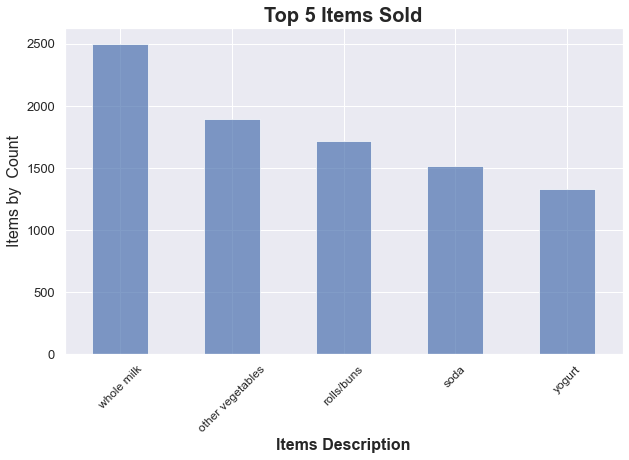

In [63]:
plt.figure(figsize=(10,6))
top10=data['itemDescription'].value_counts().head(5)
top10.plot.bar(color='b',alpha=.7)
# Customize chart
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=13)
plt.title('Top 5 Items Sold',fontsize=20,fontweight='bold')
plt.xlabel('Items Description',fontsize=16,fontweight='bold')
plt.ylabel('Items by  Count',fontsize=16)
plt.show()

The table you see contains association rules based on an analysis of frequent items sets. Each row on the table represents a rule indicating a relatonship between antecedents(items bought) and consequents(items likely to be bought). It proves there is a 

When we observe the first row we can seen when a customer buys whole milk and other vegetables they are also likely to buy yogurt rolls & buns according ot our association rules. We can apply support,confidence & lift numeric values to quantify our association rules. 

So for example if we take our first row for example support is the percentage of tranactions thst include both antecedents and consequents. in this instance 1.26% of the the transactions include(bread,rolls & yogurt) and (whole milk,sausage, other vegetables

Confidence is the probability of locating the consequences in a tranaction where the anrecedents are present. In our example the confidence level is 12% which indicated the when( rolls/buns, yogurts are present there is a 12% possibility that (whole milk,sausage and other vegetables) will also be present in the same tranasction.

A lift in excess of 1 indicates a potive correlation, in this instance the lift is 2.609 which indicates a strong positive correlation between (bread,rolls & yogurt) and (whole milk,sausage, other vegetables).

<Figure size 720x432 with 0 Axes>

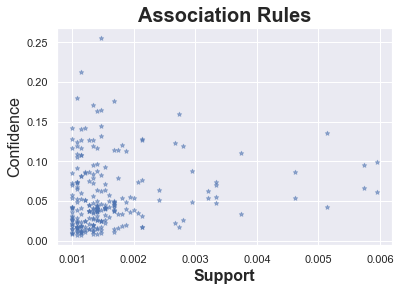

In [64]:

plt.figure(figsize=(10,6))
rules.plot.scatter('support','confidence', alpha=0.5,marker='*')
plt.title('Association Rules',fontsize=20,fontweight='bold')
plt.xlabel('Support',fontsize=16,fontweight='bold')
plt.ylabel('Confidence',fontsize=16)
plt.show()

We can see from our scatterplot there is not any item that carrys high support and confidence. 

Viskaha 18,2020. Market basket analysis.[Online Course] Udemy.Available at: https://github.com/vishakha-b18/Market-Basket-Analysis [Accesed] 11-6-2023]

Lets see if we amend the min support

In [65]:
frequent_itemsets_plus = apriori(basket_filter_plus, min_support=0.03, 
                                 use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

frequent_itemsets_plus['length'] = frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))

frequent_itemsets_plus

,support,itemsets,length
0,0.458633,(whole milk),1
1,0.376670,(other vegetables),1
2,0.350206,(rolls/buns),1
3,0.313720,(soda),1
4,0.283402,(yogurt),1
...,...,...,...
410,0.030062,"(canned beer, brown bread)",2
411,0.030062,"(pork, other vegetables, whole milk)",3
412,0.030062,"(frankfurter, pastry)",2
413,0.030062,"(shopping bags, newspapers)",2


In [66]:
frequent_itemsets_plus = apriori(basket_filter_plus, min_support=0.05, 
                                 use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

frequent_itemsets_plus['length'] = frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))

frequent_itemsets_plus

,support,itemsets,length
0,0.458633,(whole milk),1
1,0.376670,(other vegetables),1
2,0.350206,(rolls/buns),1
3,0.313720,(soda),1
4,0.283402,(yogurt),1
...,...,...,...
160,0.050617,"(tropical fruit, whole milk, other vegetables)",3
161,0.050360,"(whole milk, sausage, other vegetables)",3
162,0.050103,"(margarine, other vegetables)",2
163,0.050103,"(curd, rolls/buns)",2


We can conclude that the market basket analysis was poor in extracting patterns within in the dataset that would be useful. The model has merely replacted what we already knew from the top 5 items sold. This may be as already stated that due to the product range being low there was absence of data fo form meaaingful patterns. Market basket is primarily designed to extract patterns that we currently do no know and this respect we would need to analysis or introduce new features to extract insights which could be actioned and prove profitable for any business owner. However from our analysis we now understand why the milk and bun?bread aisles are so far apart when we enter our local supermarket.

In [1]:
basket_plus = df_new.groupby(['Day','item Description']).size().unstack().fillna(0)
basket_plus.head()

NameError: name 'df_new' is not defined

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_encode_plus = basket_plus.applymap(encode_units)
basket_filter_plus = basket_encode_plus[(basket_encode_plus > 0).sum(axis=1) >=
2]
basket_filter_plus

# Group the items by transaction and create a list of items for each transaction
transactions = df_new.groupby(['Day'])['item Description'].apply(list).values.tolist()

# Perform one-hot encoding on the transactions
te = TransactionEncoder()
one_hot_encoded = te.fit_transform(transactions)
data_encoded = pd.DataFrame(one_hot_encoded, columns=te.columns_)

# Perform market basket analysis using Apriori
frequent_itemsets = apriori(data_encoded, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Sort and display the rules based on a specific metric
sorted_rules = rules.sort_values(by='lift', ascending=False)
print(sorted_rules)

I have tried to do further research on basket analysis using the day of the week rather than the member number. my intention was to see if I could create an association for items bought on different days of the week however anytime I tried to run the code my jupyter notebook stopped working.

14 Conclusion

In conclusion we would recommend to stake holders that they can with confidence build a marketing strategy around our model that segemented the customers in low,medium & high. However with the market basket analysis we could not recommend building a marketing campaign as we have week support confidence & lift values.

15 Bibliography

DecisionTree - Jupyter Notebook (no date). Available at: http://localhost:8888/notebooks/DecisionTree.ipynb#Ensemble-learning:-using-a-random-forest (Accessed: 9 June 2023).

Sifat, S.H. (2023) Customer Segmentation Using Cluster Modeling for Churn Analysis: A Step-by-Step Tutorial, Medium. Available at: https://sajidhasan054.medium.com/cluster-modeling-for-churn-analysis-a-step-by-step-tutorial-d398f016cc1d (Accessed: 8 June 2023).

Healy, Y.H. and C. (no date) From data to Viz | Find the graphic you need. Available at: https://www.data-to-viz.com/data-to-
viz.com (Accessed: 9 June 2023).

July 2020, H.H. (no date) Delistings: have supermarket product ranges shrunk for good?, The Grocer. Available at: https://www.thegrocer.co.uk/ranging-and-merchandising/delistings-have-supermarket-product-ranges-shrunk-for-good/646058.article (Accessed: 10 June 2023).

GitHub - vishakha-b18/Market-Basket-Analysis: Market Basket Analysis for an organization to identify the most frequently selling products in order to devise cross-selling marketing strategies using Apriori algorithm. (no date) GitHub. Available at: https://github.com/vishakha-b18/Market-Basket-Analysis (Accessed: 11 June 2023).

Beginners Guide to Machine Learning - Python, Keras, SKLearn (no date) Udemy. Available at: https://www.udemy.com/course/beginners-guide-to-machine-learning/ (Accessed: 11 June 2023).

Code to toggle data on/off from IPython.display import HTML # Code taken from class notes David McQuaid December 2022

